In [59]:
from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv
from typing import TypedDict
from tqdm import tqdm

In [ ]:
import os 

os.environ["HUGGINGFACEHUB_API_TOKEN"]=''

In [61]:
llm = HuggingFaceEndpoint(
    repo_id="moonshotai/Kimi-K2-Instruct-0905",
    task="text-generation",
    temperature=0.6,  # Recommended by Moonshot AI
    max_new_tokens=4096,
)

chat_model = ChatHuggingFace(
    llm=llm
)

In [62]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [63]:
def create_outline(state: BlogState) -> BlogState:
    title = state['title']

    messages = [
        {"role": "system", "content": "You are a great blog writer that generate blog outlines with clarity and inate deep understandings."},
        {"role": "user", "content": title}
    ]

    outline = chat_model.invoke(messages).content

    state['outline'] = outline
    print(outline)
    return state

In [ ]:
def create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    messages = [
        {"role": "system", "content": "You are a great blog writer that writes blogs with clarity and inate deep understandings for title and outline provided."},
        {"role": "user", "content": f"{title} and {outline}"}
    ]

    content = chat_model.invoke(messages).content
    
    state['content'] = content

    return state

In [65]:
graph = StateGraph(BlogState)

graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()

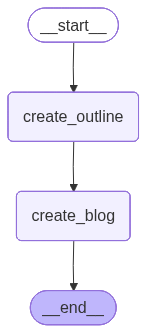

In [66]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [67]:
initial_state = {'title': 'The current state of AI'}

final_state = workflow.invoke(initial_state)

The Current State of AI – A 360° Blog Outline  
(Write-through: 2024-Q3)

0. Cold-Open Hook  
“AI can now read your ECG, write your marketing plan, and argue in front of the Supreme Court—yet it still can’t tell you why the chicken crossed the road without hallucinating.”

1. Executive Snapshot (TL;DR)  
• Capabilities are accelerating, costs are collapsing.  
• Regulation is fragmenting, not converging.  
• Winners are verticalizing; commoditization is eating the rest.  
• Society is simultaneously over-estimating short-term disruption and under-estimating long-term structural change.

2. Defining “AI” in 2024 (disambiguation table)  
| Term | Public meaning | Technical reality |  
| AI | Anything that looks smart | Foundation-model stack (LLM/VLM/Diffusion) + RL + search + memory |  
| AGI | Sci-fi god-bot | Frontier labs’ marketing term for “next-gen” |  
| Narrow AI | Chess, protein folding | Super-human, but zero-shot transfer ≈ 0 |  
| Gen-AI | ChatGPT | Autoregressive transforme

In [68]:
final_state['content']

'The Current State of AI – A 360° Snapshot (Q3-2024)\n-------------------------------------------------\n\nCold-Open Hook\n--------------\n\nAI can now read your ECG, ghost-write your quarterly marketing plan, and argue a case in front of the Supreme Court—yet ask it why the chicken crossed the road and it will still hallucinate a 3-page treatise on poultry urbanism. We have arrived at the “yes, but” moment of artificial intelligence: dazzling, indispensable, and still a little bit drunk on its own exhaust.\n\nExecutive Snapshot (TL;DR)\n--------------------------\n\n1. Capabilities are accelerating faster than costs are collapsing—GPT-4-class intelligence is already a commodity priced like a gum-ball.  \n2. Regulation is fragmenting into regional micro-climates; there is no global rule-book, only a patchwork of “we’ll know it when we see it.”  \n3. Winners are verticalizing (law, chip design, radiology) while the horizontal “AI-for-everything” layer sinks into the quicksand of open-so